In [9]:
# import library

import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


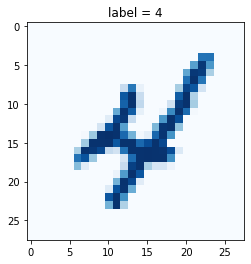

In [19]:
class Classifier(nn.Module):
  def __init__(self):
    # initialize class
    super().__init__()

    # initialize variable
    self.counter = 0
    self.progress = []

    # definition of Neural Network layer
    self.model = nn.Sequential(
        nn.Linear(784, 200),              # include 'w' which is updated for each training
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
    )

    # set Loss function
    self.loss_function = nn.MSELoss()

    # set simple SGD Optimiser
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)    # SGD = stochastic gradient descent, learning rate == 0.01

    pass

  def forward(self, inputs):
    # run model
    return self.model(inputs)
  def train(self, inputs, targets):
    # calculate NN outputs
    outputs = self.forward(inputs)

    # calculate loss
    loss = self.loss_function(outputs, targets)

    # make all gradients zero
    self.optimiser.zero_grad()
    # backpropogation
    loss.backward()
    # update learnable parameters
    self.optimiser.step()

    # Increase counter and store loss every 10 times
    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())       # item(): function that takes out value from tensor
      pass
    if (self.counter % 10000 == 0):
      print("Counter = ", self.counter)
      pass
    
  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)
  
  def __getitem__(self, index):
    # one-hot encoding
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    # range from 0 to 1
    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

    return label, image_values, target
  
  def plot_image(self, index):
    img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass
  
  pass

  def plot_image(self, index):
    img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass

mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
mnist_dataset.plot_image(9)

In [20]:
%%time

C = Classifier()

epochs = 3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass


training epoch 1 of 3
Counter =  10000
Counter =  20000
Counter =  30000
Counter =  40000
Counter =  50000
Counter =  60000
training epoch 2 of 3
Counter =  70000
Counter =  80000
Counter =  90000
Counter =  100000
Counter =  110000
Counter =  120000
training epoch 3 of 3
Counter =  130000
Counter =  140000
Counter =  150000
Counter =  160000
Counter =  170000
Counter =  180000
CPU times: user 3min 47s, sys: 2.57 s, total: 3min 50s
Wall time: 3min 50s


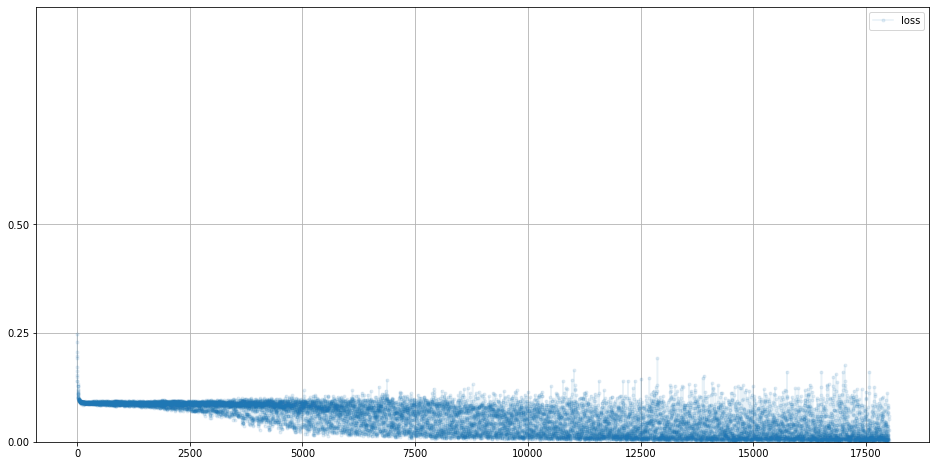

In [21]:
# plot classifier error
C.plot_progress()

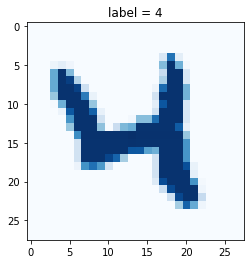

In [28]:
# load MNIST test data
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

# pick a record
record = 20

# plot image and correct label
mnist_test_dataset.plot_image(record)

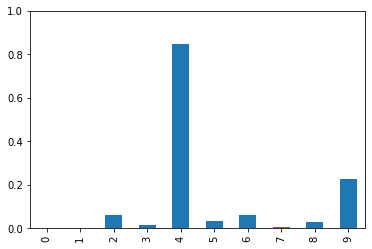

In [29]:
# visualize the answer given by the neural network
image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0, 1))

In [30]:
# test trained neural network on training data
score = 0;
items = 0;

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1;
    pass
  items += 1;

  pass
  
print(score, items, score/items)

51048 60000 0.8508
